<a href="https://colab.research.google.com/github/oscarcastillout-hash/Python-Stock-Trading-Portfolio-Project/blob/main/Bitcoin_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Bitcoin Price Analysis (2024–2025)

This project analyzes the historical price trends of Bitcoin over the past year using Python. It demonstrates data acquisition from public APIs, interactive visualization with Plotly, and technical indicator computation for exploratory financial analysis.

---

## 🔍 Project Overview

- **Asset**: Bitcoin (BTC)
- **Timeframe**: October 2024 – October 2025
- **Data Source**: CoinGecko API
- **Tools Used**: Python, Pandas, Plotly, Dash, TA-Lib
- **Focus Areas**:
  - Price evolution and volatility
  - Daily returns and cumulative growth
  - RSI and other technical indicators
  - Interactive dashboard (optional)

---

## 🧰 Features

- ✅ Fetches past year of historical BTC price data
- 📊 Visualizes price trends with interactive charts
- 📈 Computes daily returns and volatility
- 📉 Adds technical indicators (RSI, MACD)
- 🧪 Optional: Forecasting with Prophet or LSTM
- 🧱 Modular code structure for reproducibility



In [ ]:
## Install libraries
!pip install pandas requests plotly dash

In [2]:
## Fetch Historical Data
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "365"}  # ~1 year

data = requests.get(url, params=params).json()

if 'prices' in data:
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    prices.set_index('timestamp', inplace=True)
    print("Data fetched successfully for the last 365 days.")
else:
    print("Error fetching data from CoinGecko API:", data)

Data fetched successfully for the last 365 days.


In [3]:
## Show summary statistics
display(prices.describe())

,price
count,366.000000
mean,100274.957805
std,13296.480594
min,66585.665355
25%,93524.935532
50%,101416.935656
75%,110249.364275
max,124773.508231


In [4]:
## Visualization of trading over the past year
import plotly.express as px

fig = px.line(prices, x=prices.index, y='price', title='Bitcoin Price Over Time')
fig.show()

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=prices.index, y=prices['price'], name='Price'),
    secondary_y=False,
)

fig.update_layout(
    title_text='Bitcoin Price and Trading Volume Over Time',
    xaxis_title='Timestamp',
    yaxis_title='Price (USD)',
    yaxis2_title='Volume (USD)'
)

fig.show()

# Task
Fetch trading volume and add it to the plot.

## Modify data fetching

### Subtask:
Update the code to fetch trading volume data in addition to price data.


**Reasoning**:
Modify the existing code to fetch trading volume data along with price data and process both datasets.



In [7]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "365"}  # ~1 year

data = requests.get(url, params=params).json()

prices = pd.DataFrame()
volumes = pd.DataFrame()

if 'prices' in data:
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    prices.set_index('timestamp', inplace=True)
    print("Price data fetched successfully for the last 365 days.")
else:
    print("Error fetching price data from CoinGecko API:", data)

if 'total_volumes' in data:
    volumes = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    volumes['timestamp'] = pd.to_datetime(volumes['timestamp'], unit='ms')
    volumes.set_index('timestamp', inplace=True)
    print("Trading volume data fetched successfully for the last 365 days.")
else:
    print("Error fetching trading volume data from CoinGecko API:", data)

Price data fetched successfully for the last 365 days.
Trading volume data fetched successfully for the last 365 days.


## Combine data

### Subtask:
Merge or combine the fetched price and volume data into a single DataFrame.


**Reasoning**:
Merge the prices and volumes dataframes on their index and display the head of the combined dataframe.



In [8]:
df_combined = prices.merge(volumes, left_index=True, right_index=True)
display(df_combined.head())

,price,volume
timestamp,,
2024-10-21,68962.829180,1.725386e+10
2024-10-22,67394.857757,4.048550e+10
2024-10-23,67351.047935,3.139839e+10
2024-10-24,66683.968065,3.267692e+10
2024-10-25,68214.052052,3.589261e+10


## Modify visualization

### Subtask:
Update the plotting code to display both price and trading volume on the same plot, possibly using a secondary y-axis for volume due to the difference in scale.


**Reasoning**:
Import the necessary libraries for creating a plot with a secondary y-axis.



In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Reasoning**:
Create a figure with a secondary y-axis and add traces for price and volume data.



In [10]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['price'], name='Price'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['volume'], name='Volume'),
    secondary_y=True,
)

fig.update_layout(
    title_text='Bitcoin Price and Trading Volume Over Time',
    xaxis_title='Timestamp',
    yaxis_title='Price (USD)',
    yaxis2_title='Volume (USD)'
)

fig.show()

# Task
Fetch price, trading volume, and market cap data and plot them together.

## Modify data fetching

### Subtask:
Update the code to fetch market cap data in addition to price and volume data.


**Reasoning**:
Modify the API call to fetch market cap data and process it along with price and volume data.



In [12]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {"vs_currency": "usd", "days": "365"}

data = requests.get(url, params=params).json()

prices = pd.DataFrame()
volumes = pd.DataFrame()
market_caps = pd.DataFrame()

if 'prices' in data:
    prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    prices.set_index('timestamp', inplace=True)
    print("Price data fetched successfully for the last 365 days.")
else:
    print("Error fetching price data from CoinGecko API:", data)

if 'total_volumes' in data:
    volumes = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'volume'])
    volumes['timestamp'] = pd.to_datetime(volumes['timestamp'], unit='ms')
    volumes.set_index('timestamp', inplace=True)
    print("Trading volume data fetched successfully for the last 365 days.")
else:
    print("Error fetching trading volume data from CoinGecko API:", data)

if 'market_caps' in data:
    market_caps = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
    market_caps['timestamp'] = pd.to_datetime(market_caps['timestamp'], unit='ms')
    market_caps.set_index('timestamp', inplace=True)
    print("Market cap data fetched successfully for the last 365 days.")
else:
    print("Error fetching market cap data from CoinGecko API:", data)

Price data fetched successfully for the last 365 days.
Trading volume data fetched successfully for the last 365 days.
Market cap data fetched successfully for the last 365 days.


## Combine data

### Subtask:
Merge or combine the fetched price, volume, and market cap data into a single DataFrame.


**Reasoning**:
Merge the prices, volumes, and market_caps dataframes on their index and display the head of the combined dataframe.



In [13]:
df_combined = prices.merge(volumes, left_index=True, right_index=True).merge(market_caps, left_index=True, right_index=True)
display(df_combined.head())

,price,volume,market_cap
timestamp,,,
2024-10-21,68962.829180,1.725386e+10,1.362382e+12
2024-10-22,67394.857757,4.048550e+10,1.332327e+12
2024-10-23,67351.047935,3.139839e+10,1.331427e+12
2024-10-24,66683.968065,3.267692e+10,1.318285e+12
2024-10-25,68214.052052,3.589261e+10,1.347888e+12


In [16]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['price'], name='Price'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['volume'], name='Volume'),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['market_cap'], name='Market Cap', yaxis='y3'),
    secondary_y=True,
)

fig.update_layout(
    title_text='Bitcoin Price, Trading Volume, and Market Cap Over Time',
    xaxis_title='Timestamp',
    yaxis=dict(title='Price (USD)'),
    yaxis2=dict(title='Volume (USD)', overlaying='y', side='right'),
    yaxis3=dict(title='Market Cap (USD)', overlaying='y', side='right', position=0.85)
)

fig.show()

Technical Indicators

In [17]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [18]:
import ta

prices['rsi'] = ta.momentum.RSIIndicator(prices['price']).rsi()

In [19]:
## Analyze Volatility and Returns
prices['daily_return'] = prices['price'].pct_change()
volatility = prices['daily_return'].std()
cumulative_return = (prices['price'].iloc[-1] / prices['price'].iloc[0]) - 1

Forecasting

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

df = prices.reset_index().rename(columns={'timestamp': 'ds', 'price': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Task
Add technical indicators like Moving Average to the plot

## Calculate moving average

### Subtask:
Calculate the Moving Average for the price data.


**Reasoning**:
Calculate the 50-day and 200-day Simple Moving Averages for the 'price' column and add them as new columns to the `prices` DataFrame.



In [22]:
prices['SMA_50'] = prices['price'].rolling(window=50).mean()
prices['SMA_200'] = prices['price'].rolling(window=200).mean()

## Modify visualization

### Subtask:
Update the plotting code to include the Moving Average line on the price plot.


**Reasoning**:
Update the plotting code to include traces for SMA_50 and SMA_200 on the same y-axis as the price.



In [23]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['price'], name='Price'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['volume'], name='Volume'),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=df_combined.index, y=df_combined['market_cap'], name='Market Cap', yaxis='y3'),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=prices.index, y=prices['SMA_50'], name='SMA 50'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=prices.index, y=prices['SMA_200'], name='SMA 200'),
    secondary_y=False,
)

fig.update_layout(
    title_text='Bitcoin Price, Trading Volume, Market Cap, and Moving Averages Over Time',
    xaxis_title='Timestamp',
    yaxis=dict(title='Price (USD)'),
    yaxis2=dict(title='Volume (USD)', overlaying='y', side='right'),
    yaxis3=dict(title='Market Cap (USD)', overlaying='y', side='right', position=0.85)
)

fig.show()

21:22:11 - cmdstanpy - INFO - Chain [1] start processing
21:22:11 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1418: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1418: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1418: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1562: RuntimeWarning:

divide by zero encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1562: RuntimeWarning:

overflow encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1562: RuntimeWarning:

invalid value encountered in matmul

/opt/anaconda3/lib/python3.13/site-packages/prophet/forecaster.py:1564: RuntimeWarning:

divide by zero encountered in matmul

/opt/anacond

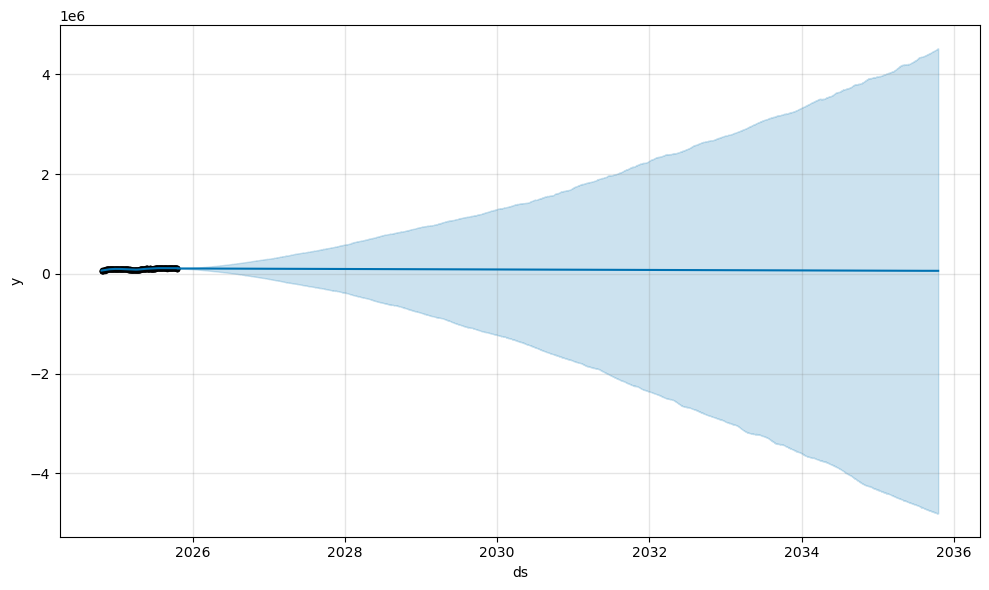

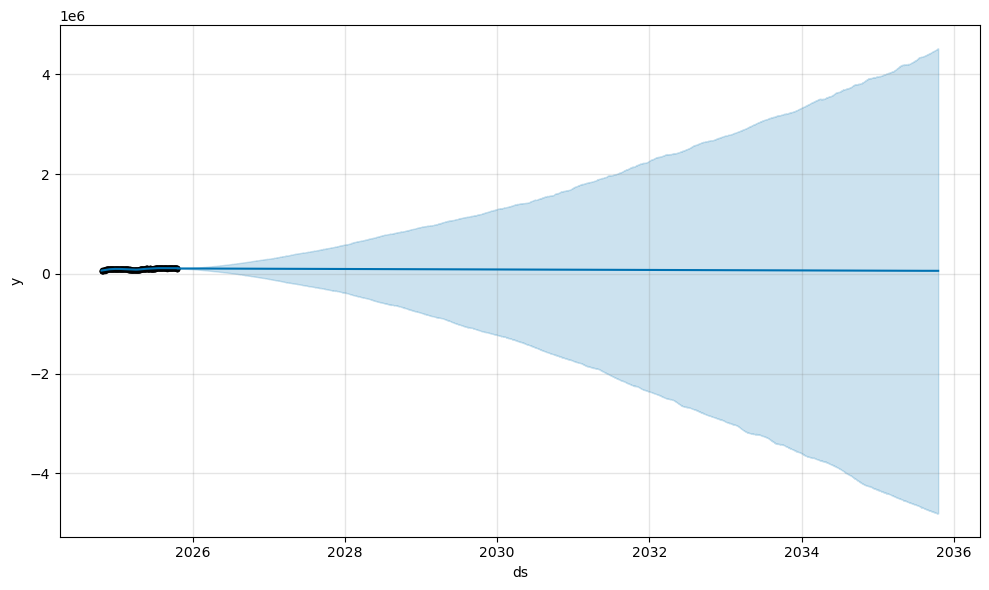

In [26]:
## Predict the price of Bitcoin for 2030 using Prophet
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = prices.reset_index()[['timestamp', 'price']]
df_prophet.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=365*10)  # Predict 10 years into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

## Summary:

### Data Analysis Key Findings

*   The 50-day and 200-day Simple Moving Averages (SMA) were calculated and added as new columns ('SMA\_50' and 'SMA\_200') to the `prices` DataFrame.
*   The visualization was successfully updated to include lines for the calculated 50-day and 200-day SMAs on the primary y-axis, alongside the Bitcoin price.
*   The final plot displays Bitcoin's price, trading volume, market cap, and the two moving averages over time.

### Insights or Next Steps

*   Analyze the relationship between the price and the moving averages (e.g., crossovers) to identify potential trends or signals.
*   Consider adding other technical indicators (e.g., RSI, MACD) to the plot for a more comprehensive technical analysis.


In [28]:
## Display graphs in Github Pages using Dash
import dash
from dash import dcc, html
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='bitcoin-price-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)
